# Kepler Datasets - Classification

**Intro to this project**

Based on the collected Kepler disposition data, I want to build a classification system that could help predict new exoplanets and also to analyze the critical factors affecting the exoplanet dispositions.

**Data**

9564 rows with 50 columns 
- Missing Values
-Normalization/Standardization


**Model**

- Logistic regression
- SVM
- Random forest

Random forest performs the best concerning cross-validated prediction accuracy.

**Further Improvement**


1. Try to apply dimensionality reduction methods such as PCA/LDA, which may help deal with multicollinearity or accelerate the modelling process.
2. Try other ensemble models such as bagging or boosting



# Data Cleaning and Processing

In [2]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import imblearn
import seaborn as sns

In [3]:
raw_df = pd.read_csv("../Resources/cumulative.csv")
raw_df

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,9560,10031643,K07984.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,0,0,...,-152.0,4.296,0.231,-0.189,1.088,0.313,-0.228,298.74921,46.973351,14.478
9560,9561,10090151,K07985.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,1,...,-166.0,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
9561,9562,10128825,K07986.01,NaN,CANDIDATE,CANDIDATE,0.497,0,0,0,...,-220.0,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757
9562,9563,10147276,K07987.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.021,0,0,1,...,-236.0,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385


In [4]:
raw_df.columns

Index(['rowid', 'kepid', 'kepoi_name', 'kepler_name', 'koi_disposition',
       'koi_pdisposition', 'koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss',
       'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period', 'koi_period_err1',
       'koi_period_err2', 'koi_time0bk', 'koi_time0bk_err1',
       'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1', 'koi_impact_err2',
       'koi_duration', 'koi_duration_err1', 'koi_duration_err2', 'koi_depth',
       'koi_depth_err1', 'koi_depth_err2', 'koi_prad', 'koi_prad_err1',
       'koi_prad_err2', 'koi_teq', 'koi_teq_err1', 'koi_teq_err2', 'koi_insol',
       'koi_insol_err1', 'koi_insol_err2', 'koi_model_snr', 'koi_tce_plnt_num',
       'koi_tce_delivname', 'koi_steff', 'koi_steff_err1', 'koi_steff_err2',
       'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad',
       'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec', 'koi_kepmag'],
      dtype='object')

In [5]:
raw_df['koi_disposition'].value_counts()

FALSE POSITIVE    5023
CONFIRMED         2293
CANDIDATE         2248
Name: koi_disposition, dtype: int64

In [6]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 50 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              9564 non-null   int64  
 1   kepid              9564 non-null   int64  
 2   kepoi_name         9564 non-null   object 
 3   kepler_name        2294 non-null   object 
 4   koi_disposition    9564 non-null   object 
 5   koi_pdisposition   9564 non-null   object 
 6   koi_score          8054 non-null   float64
 7   koi_fpflag_nt      9564 non-null   int64  
 8   koi_fpflag_ss      9564 non-null   int64  
 9   koi_fpflag_co      9564 non-null   int64  
 10  koi_fpflag_ec      9564 non-null   int64  
 11  koi_period         9564 non-null   float64
 12  koi_period_err1    9110 non-null   float64
 13  koi_period_err2    9110 non-null   float64
 14  koi_time0bk        9564 non-null   float64
 15  koi_time0bk_err1   9110 non-null   float64
 16  koi_time0bk_err2   9110 

According to the dataframe info as shown above, several redundant columns should be removed.

In [7]:
df = raw_df.drop(columns = ['rowid', 'kepid', 'kepoi_name', 'kepler_name','koi_pdisposition', 'koi_score', 'koi_teq_err1', 'koi_teq_err2','koi_tce_delivname'])

In [8]:
df.isna().sum()

koi_disposition        0
koi_fpflag_nt          0
koi_fpflag_ss          0
koi_fpflag_co          0
koi_fpflag_ec          0
koi_period             0
koi_period_err1      454
koi_period_err2      454
koi_time0bk            0
koi_time0bk_err1     454
koi_time0bk_err2     454
koi_impact           363
koi_impact_err1      454
koi_impact_err2      454
koi_duration           0
koi_duration_err1    454
koi_duration_err2    454
koi_depth            363
koi_depth_err1       454
koi_depth_err2       454
koi_prad             363
koi_prad_err1        363
koi_prad_err2        363
koi_teq              363
koi_insol            321
koi_insol_err1       321
koi_insol_err2       321
koi_model_snr        363
koi_tce_plnt_num     346
koi_steff            363
koi_steff_err1       468
koi_steff_err2       483
koi_slogg            363
koi_slogg_err1       468
koi_slogg_err2       468
koi_srad             363
koi_srad_err1        468
koi_srad_err2        468
ra                     0
dec                    0


In [9]:
df = df.dropna(how='any')
df.isna().sum()

koi_disposition      0
koi_fpflag_nt        0
koi_fpflag_ss        0
koi_fpflag_co        0
koi_fpflag_ec        0
koi_period           0
koi_period_err1      0
koi_period_err2      0
koi_time0bk          0
koi_time0bk_err1     0
koi_time0bk_err2     0
koi_impact           0
koi_impact_err1      0
koi_impact_err2      0
koi_duration         0
koi_duration_err1    0
koi_duration_err2    0
koi_depth            0
koi_depth_err1       0
koi_depth_err2       0
koi_prad             0
koi_prad_err1        0
koi_prad_err2        0
koi_teq              0
koi_insol            0
koi_insol_err1       0
koi_insol_err2       0
koi_model_snr        0
koi_tce_plnt_num     0
koi_steff            0
koi_steff_err1       0
koi_steff_err2       0
koi_slogg            0
koi_slogg_err1       0
koi_slogg_err2       0
koi_srad             0
koi_srad_err1        0
koi_srad_err2        0
ra                   0
dec                  0
koi_kepmag           0
dtype: int64

In [10]:
# df.to_csv('../Resources/cleaned_data.csv',index = False)
df

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,FALSE POSITIVE,0,1,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,CONFIRMED,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,FALSE POSITIVE,0,0,0,1,8.589871,1.846000e-04,-1.846000e-04,132.016100,0.015700,...,-152.0,4.296,0.231,-0.189,1.088,0.313,-0.228,298.74921,46.973351,14.478
9560,FALSE POSITIVE,0,1,1,0,0.527699,1.160000e-07,-1.160000e-07,131.705093,0.000170,...,-166.0,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
9561,CANDIDATE,0,0,0,0,1.739849,1.780000e-05,-1.780000e-05,133.001270,0.007690,...,-220.0,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757
9562,FALSE POSITIVE,0,0,1,0,0.681402,2.434000e-06,-2.434000e-06,132.181750,0.002850,...,-236.0,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385



Traning/test set splitting

In [12]:
from sklearn.model_selection import train_test_split
y = df['koi_disposition']
X = df.drop(columns='koi_disposition')

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, stratify = y)
X_train.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
5964,1,0,0,0,252.044440,0.027490,-0.027490,265.2010,0.0494,-0.0494,...,-136.0,4.621,0.041,-0.035,0.664,0.057,-0.059,292.79022,41.948639,15.884
9410,1,0,0,0,371.518520,0.015790,-0.015790,317.6836,0.0339,-0.0339,...,-206.0,4.377,0.101,-0.203,1.089,0.364,-0.145,293.06400,45.034210,13.731
4204,0,0,1,0,8.038670,0.000114,-0.000114,135.3098,0.0123,-0.0123,...,-181.0,4.485,0.050,-0.200,0.975,0.282,-0.101,290.51785,41.238762,14.999
5933,0,0,0,0,18.782160,0.000406,-0.000406,147.8508,0.0148,-0.0148,...,-167.0,4.488,0.048,-0.290,0.940,0.386,-0.087,291.76413,41.860130,14.043
6996,1,0,1,0,12.429716,0.000472,-0.000472,141.2846,0.0420,-0.0420,...,-200.0,4.534,0.037,-0.213,0.905,0.281,-0.088,297.52072,40.585419,15.842


# Exploratory Data Analysis

## X variables

In [14]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6558 entries, 5964 to 2335
Data columns (total 40 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   koi_fpflag_nt      6558 non-null   int64  
 1   koi_fpflag_ss      6558 non-null   int64  
 2   koi_fpflag_co      6558 non-null   int64  
 3   koi_fpflag_ec      6558 non-null   int64  
 4   koi_period         6558 non-null   float64
 5   koi_period_err1    6558 non-null   float64
 6   koi_period_err2    6558 non-null   float64
 7   koi_time0bk        6558 non-null   float64
 8   koi_time0bk_err1   6558 non-null   float64
 9   koi_time0bk_err2   6558 non-null   float64
 10  koi_impact         6558 non-null   float64
 11  koi_impact_err1    6558 non-null   float64
 12  koi_impact_err2    6558 non-null   float64
 13  koi_duration       6558 non-null   float64
 14  koi_duration_err1  6558 non-null   float64
 15  koi_duration_err2  6558 non-null   float64
 16  koi_depth          65

In [19]:
X_train.describe()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
count,6558.000000,6558.000000,6558.000000,6558.000000,6558.000000,6.558000e+03,6.558000e+03,6558.000000,6558.000000,6558.000000,...,6558.000000,6558.000000,6558.000000,6558.000000,6558.000000,6558.000000,6558.000000,6558.000000,6558.000000,6558.000000
mean,0.154925,0.242909,0.199299,0.123056,55.356968,1.852184e-03,-1.852184e-03,164.231527,0.009349,-0.009349,...,-161.875267,4.313949,0.120408,-0.140084,1.698168,0.352467,-0.386070,292.065232,43.879008,14.276796
std,0.361861,0.428874,0.399503,0.328526,116.102327,7.508542e-03,7.508542e-03,64.709154,0.022532,0.022532,...,76.017815,0.428967,0.132621,0.082715,5.724421,0.921165,1.982278,4.782950,3.597886,1.352010
min,0.000000,0.000000,0.000000,0.000000,0.306702,1.100000e-08,-1.568000e-01,120.515914,0.000009,-0.569000,...,-1762.000000,0.114000,0.000000,-1.007000,0.109000,0.000000,-103.825000,279.856080,36.678841,6.966000
25%,0.000000,0.000000,0.000000,0.000000,2.648482,5.100250e-06,-2.291250e-04,132.702193,0.001160,-0.009898,...,-197.000000,4.217000,0.043000,-0.195000,0.825000,0.124000,-0.243750,288.639588,40.858858,13.485000
50%,0.000000,0.000000,0.000000,0.000000,8.930302,3.253500e-05,-3.253500e-05,136.830935,0.003965,-0.003965,...,-159.000000,4.442000,0.070000,-0.126000,0.993000,0.245000,-0.109000,292.276120,43.823961,14.545500
75%,0.000000,0.000000,0.000000,0.000000,33.369140,2.291250e-04,-5.100250e-06,169.865117,0.009898,-0.001160,...,-112.000000,4.546000,0.149000,-0.085000,1.342750,0.353000,-0.069000,295.905030,46.751687,15.323000
max,1.000000,1.000000,1.000000,1.000000,677.562820,1.568000e-01,-1.100000e-08,746.196768,0.569000,-0.000009,...,0.000000,5.364000,1.472000,0.000000,180.013000,33.091000,0.000000,301.720760,52.220341,18.231000


It can be noticed that the variables in training set have a large range of scales. As a result, scaling such as normalization or standardization would be neccesary to balance the weights for all the variables for some models.

Traning set normalization

In [33]:
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler().fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

Training set standardization

In [34]:
from sklearn.preprocessing import StandardScaler

X_train_stand = X_train.copy()
X_test_stand = X_test.copy()

# only numerical features
num_cols = X.columns

# apply standardization on numerical features
for i in num_cols:
    scale = StandardScaler().fit(X_train_stand[[i]])
    X_train_stand[i] = scale.transform(X_train_stand[[i]])
    X_test_stand[i] = scale.transform(X_test_stand[[i]])

Store the trainng/test data

In [ ]:
%store X_train
%store X_test
%store y_train
%store y_test
%store X_train_scaled
%store X_test_scaled 
%store X_train_stand
%store X_test_stand

There are 40 features. Let's see the correlations between each independent variable. Some dimensionality reduction methods such as PCA could be applied.

In [31]:
corrMatrix = X_train.corr()
corrMatrix.sort_values('koi_fpflag_nt')

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
koi_period_err2,-0.343660,0.130794,0.089186,0.076969,-0.656065,-1.000000,1.000000,-0.464978,-0.455538,0.455538,...,0.054465,0.006417,0.000712,0.132946,-0.010979,-0.028273,0.003842,0.017527,0.001366,0.027934
koi_duration_err2,-0.338075,0.184509,0.001797,-0.025648,-0.372814,-0.526355,0.526355,-0.247583,-0.519094,0.519094,...,0.073294,0.041407,-0.019890,0.124852,-0.032926,-0.058792,0.036193,-0.007908,0.025148,0.055372
koi_time0bk_err2,-0.239183,0.168133,0.026171,-0.010696,-0.266161,-0.455538,0.455538,-0.170313,-1.000000,1.000000,...,0.052300,0.041191,-0.034745,0.111783,-0.040793,-0.046926,0.036344,0.002946,0.010596,0.025161
koi_fpflag_ss,-0.236632,1.000000,0.140208,0.095223,-0.151552,-0.130794,0.130794,-0.112625,-0.168133,0.168133,...,-0.173698,-0.059248,0.126597,-0.067762,0.033100,0.042947,-0.035851,0.100898,-0.043158,-0.016475
koi_steff_err2,-0.146581,-0.173698,-0.113036,-0.075306,-0.035552,-0.054465,0.054465,-0.025499,-0.052300,0.052300,...,1.000000,0.087766,-0.154270,0.387235,0.010149,-0.060619,0.029106,-0.124686,0.009766,0.056747
koi_slogg_err2,-0.139183,-0.067762,-0.061067,-0.050199,-0.165289,-0.132946,0.132946,-0.108692,-0.111783,0.111783,...,0.387235,0.044915,-0.229470,1.000000,0.031126,-0.166986,0.011544,-0.063740,-0.006723,-0.023247
koi_slogg,-0.123617,-0.059248,-0.005069,0.006820,-0.045208,-0.006417,0.006417,0.002275,-0.041191,0.041191,...,0.087766,1.000000,-0.499010,0.044915,-0.650668,-0.624416,0.564247,-0.079619,0.054939,0.485483
koi_kepmag,-0.080604,-0.016475,0.074703,0.041288,-0.042712,-0.027934,0.027934,0.014374,-0.025161,0.025161,...,0.056747,0.485483,-0.330397,-0.023247,-0.186599,-0.207108,0.169677,0.008996,0.016215,1.000000
koi_model_snr,-0.080022,0.440793,-0.131324,-0.092361,-0.069926,-0.078038,0.078038,-0.065247,-0.127701,0.127701,...,-0.112930,-0.051298,0.124897,-0.027181,-0.008451,0.003939,-0.005745,0.044509,-0.003052,-0.127494
koi_srad_err2,-0.057872,-0.035851,-0.012540,-0.009425,-0.000015,-0.003842,0.003842,0.011877,-0.036344,0.036344,...,0.029106,0.564247,-0.193613,0.011544,-0.873199,-0.708926,1.000000,-0.050311,0.032634,0.169677


PCA

PCA focus on the variace so PCA is sensitive to the variable scales, so standardized variables are used for PCA.

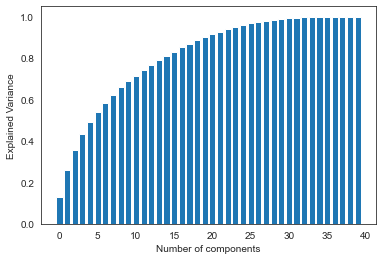

In [43]:
from sklearn.decomposition import PCA
pca = PCA(40)
df_P=pca.fit_transform(X_train_stand)
eigenvalues = pca.explained_variance_ratio_
#plot explained variance over the number of compinents
n=40
plt.bar(np.arange(n), eigenvalues[:n].cumsum())
plt.xlabel("Number of components")
plt.ylabel("Explained Variance")
plt.show()

In [44]:
for i in range(n):
    if list(eigenvalues[:i+1].cumsum())[i] >= 0.8:
        print('{} leading principal components are needed to cover 80%'.format(i+1))
        break

15 leading principal components are needed to cover 80%


In [40]:
df_C = df_P[:,:10]
df_C

array([[ 6.0274058 , -0.27052054, -0.8301879 , ..., -0.7004001 ,
        -0.73316844,  0.12104069],
       [ 5.9991493 ,  0.63144021, -0.62086086, ...,  0.96946139,
        -0.91632981, -1.30012979],
       [-0.20965635, -0.43902751, -0.06811682, ...,  0.21391528,
         0.17108474,  0.27241427],
       ...,
       [ 1.09203511, -0.29260852, -0.07730366, ...,  1.78096946,
        -0.10756445,  0.12346867],
       [ 4.66623937,  0.19727196, -0.71048449, ...,  1.36020835,
        -0.91423951, -0.49053747],
       [-1.24801029, -1.0092084 ,  0.04901137, ..., -0.28150198,
         0.50234379,  0.02030782]])

LDA

In [47]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model_lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = model_lda.fit(X_train_stand, y_train).transform(X_train_stand)
print("Component variance ratio",model_lda.explained_variance_ratio_)
print("Dimension before LDA",X_train_stand.shape)
print("Dimension after LDA",X_lda.shape)

Component variance ratio [0.97391472 0.02608528]
Dimension before LDA (6558, 40)
Dimension after LDA (6558, 2)


## Y variables

In [21]:
y_train.value_counts()

FALSE POSITIVE    3268
CONFIRMED         1704
CANDIDATE         1586
Name: koi_disposition, dtype: int64

Text(0.5, 1.0, 'Disposition Counts')

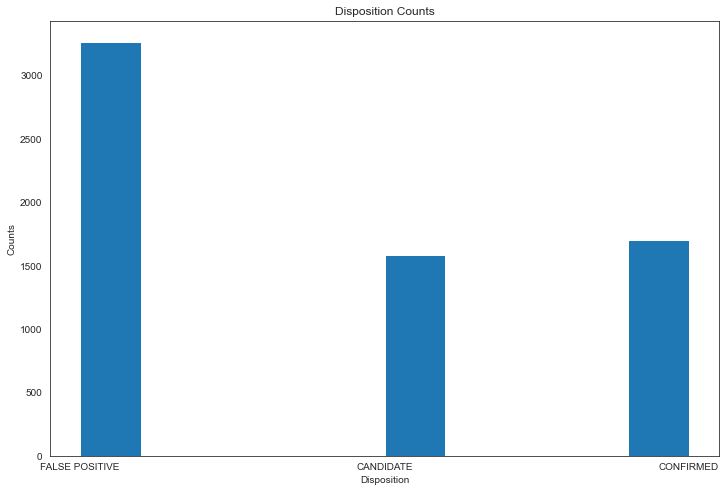

In [29]:
sns.set_style('white')
plt.figure(figsize=(12, 8))
plt.hist(y_train)
plt.xlabel('Disposition')
plt.ylabel('Counts')
plt.title('Disposition Counts')

From the histgram, it can be seen that most of exoplanets are labeled as "False Positive".

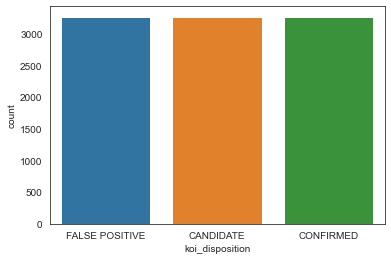

In [51]:
from imblearn.over_sampling import SMOTE
#Oversampling the data

feature_names = X_train.columns
smote = SMOTE(random_state = 101)
X, y = smote.fit_resample(X_train_stand, y_train)
#Creating a new Oversampling Data Frame
df_oversampler = pd.DataFrame(X)
df_oversampler
sns.countplot(y)

In [52]:
X

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,2.335535,-0.566433,-0.498904,-0.374598,1.694216,3.414747,-3.414747,1.560477,1.777675,-1.777675,...,0.340410,0.715846,-0.598806,1.270532,-0.180673,-0.320778,0.165010,0.151589,-0.536570,1.188842
1,2.335535,-0.566433,-0.498904,-0.374598,2.723336,1.856403,-1.856403,2.371593,1.089707,-1.089707,...,-0.580497,0.146995,-0.146354,-0.760700,-0.106424,0.012521,0.121622,0.208834,0.321102,-0.403723
2,-0.428167,-0.566433,2.004395,-0.374598,-0.407588,-0.231565,0.231565,-0.446984,0.130991,-0.130991,...,-0.251601,0.398782,-0.530938,-0.724428,-0.126340,-0.076503,0.143820,-0.323545,-0.733889,0.534211
3,-0.428167,-0.566433,-0.498904,-0.374598,-0.315046,-0.192606,0.192606,-0.253163,0.241953,-0.241953,...,-0.067420,0.405776,-0.546020,-1.812588,-0.132455,0.036406,0.150883,-0.062958,-0.561172,-0.172938
4,2.335535,-0.566433,2.004395,-0.374598,-0.369765,-0.183776,0.183776,-0.354643,1.449225,-1.449225,...,-0.501562,0.513018,-0.628970,-0.881606,-0.138569,-0.077589,0.150379,1.140698,-0.915493,1.157775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9799,1.057736,-0.566433,-0.498904,-0.374598,1.200092,0.075875,-0.075875,1.774180,-0.074407,0.074407,...,0.934681,-0.383792,-0.211393,0.702415,-0.055266,-0.215538,0.130388,1.005627,0.544338,0.376214
9800,-0.428167,-0.566433,-0.498904,-0.374598,-0.416587,-0.245246,0.245246,-0.014772,-0.365152,0.365152,...,-0.216000,0.327073,-0.264149,-0.653660,-0.130849,-0.091641,0.128924,-0.382259,1.899419,0.714413
9801,-0.428167,-0.566433,-0.498904,-0.374598,-0.117986,-0.228861,0.228861,-0.343994,-0.269741,0.269741,...,-0.547568,0.462509,-0.561193,-0.597294,-0.132652,-0.099868,0.152140,-0.171369,-1.257868,0.956055
9802,-0.428167,-0.566433,-0.498904,-0.374598,-0.414304,-0.245104,0.245104,0.156919,-0.357136,0.357136,...,1.038138,0.468325,-0.431281,1.274668,-0.153004,-0.340847,0.165651,-0.385626,-0.072138,0.906706


In [53]:
X_train_stand

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
5964,2.335535,-0.566433,-0.498904,-0.374598,1.694216,3.414747,-3.414747,1.560477,1.777675,-1.777675,...,0.340410,0.715846,-0.598806,1.270532,-0.180673,-0.320778,0.165010,0.151589,-0.536570,1.188842
9410,2.335535,-0.566433,-0.498904,-0.374598,2.723336,1.856403,-1.856403,2.371593,1.089707,-1.089707,...,-0.580497,0.146995,-0.146354,-0.760700,-0.106424,0.012521,0.121622,0.208834,0.321102,-0.403723
4204,-0.428167,-0.566433,2.004395,-0.374598,-0.407588,-0.231565,0.231565,-0.446984,0.130991,-0.130991,...,-0.251601,0.398782,-0.530938,-0.724428,-0.126340,-0.076503,0.143820,-0.323545,-0.733889,0.534211
5933,-0.428167,-0.566433,-0.498904,-0.374598,-0.315046,-0.192606,0.192606,-0.253163,0.241953,-0.241953,...,-0.067420,0.405776,-0.546020,-1.812588,-0.132455,0.036406,0.150883,-0.062958,-0.561172,-0.172938
6996,2.335535,-0.566433,2.004395,-0.374598,-0.369765,-0.183776,0.183776,-0.354643,1.449225,-1.449225,...,-0.501562,0.513018,-0.628970,-0.881606,-0.138569,-0.077589,0.150379,1.140698,-0.915493,1.157775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7050,-0.428167,1.765435,-0.498904,-0.374598,-0.431500,-0.246667,0.246667,-0.442082,-0.413502,0.413502,...,0.879799,-0.237679,-0.500775,0.170281,-0.026060,-0.079760,0.129694,0.022847,-0.719463,-0.547224
1882,-0.428167,-0.566433,-0.498904,-0.374598,-0.204732,-0.230566,0.230566,-0.133162,-0.279127,0.279127,...,0.590371,-0.323939,0.464457,0.508820,-0.057856,-0.155757,0.065621,0.523085,0.610626,-0.098968
315,-0.428167,-0.566433,-0.498904,-0.374598,0.299475,-0.187652,0.187652,2.967389,-0.272913,0.272913,...,-1.133041,0.142332,-0.485693,-1.014604,-0.084411,0.062462,0.125658,0.242270,-1.624808,0.505363
6070,2.335535,-0.566433,-0.498904,-0.374598,2.604918,1.685917,-1.685917,2.239827,0.707996,-0.707996,...,0.366722,0.188959,0.004464,-1.304780,-0.125292,0.021207,0.127171,-0.456691,-0.781015,-0.085654


In [49]:
X

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,0,0,0,252.044440,0.027490,-0.027490,265.201000,0.049400,-0.049400,...,-136.000000,4.621000,0.041000,-0.035000,0.664000,0.057000,-0.059000,292.790220,41.948639,15.884000
1,1,0,0,0,371.518520,0.015790,-0.015790,317.683600,0.033900,-0.033900,...,-206.000000,4.377000,0.101000,-0.203000,1.089000,0.364000,-0.145000,293.064000,45.034210,13.731000
2,0,0,1,0,8.038670,0.000114,-0.000114,135.309800,0.012300,-0.012300,...,-181.000000,4.485000,0.050000,-0.200000,0.975000,0.282000,-0.101000,290.517850,41.238762,14.999000
3,0,0,0,0,18.782160,0.000406,-0.000406,147.850800,0.014800,-0.014800,...,-167.000000,4.488000,0.048000,-0.290000,0.940000,0.386000,-0.087000,291.764130,41.860130,14.043000
4,1,0,1,0,12.429716,0.000472,-0.000472,141.284600,0.042000,-0.042000,...,-200.000000,4.534000,0.037000,-0.213000,0.905000,0.281000,-0.088000,297.520720,40.585419,15.842000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9799,0,0,0,0,148.888967,0.001608,-0.001608,245.749091,0.006225,-0.006225,...,-105.623505,4.205734,0.063709,-0.058871,1.313862,0.120184,-0.100345,297.292396,45.643146,14.888044
9800,0,0,0,0,11.114624,0.000064,-0.000064,137.479615,0.004467,-0.004467,...,-124.620875,4.298232,0.149787,-0.129739,1.128815,0.198640,-0.202090,290.462629,42.140551,14.965664
9801,0,0,0,0,35.110093,0.000191,-0.000191,137.096770,0.004645,-0.004645,...,-181.867816,4.550563,0.041461,-0.194012,0.854868,0.244383,-0.078976,290.411057,44.705086,15.415877
9802,0,0,0,0,9.426778,0.000017,-0.000017,175.220566,0.001379,-0.001379,...,-138.458805,4.583504,0.027838,-0.083216,0.778676,0.092621,-0.050793,291.779797,44.116257,15.552523


In [50]:
X_train

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
5964,1,0,0,0,252.044440,2.749000e-02,-2.749000e-02,265.201000,0.049400,-0.049400,...,-136.0,4.621,0.041,-0.035,0.664,0.057,-0.059,292.79022,41.948639,15.884
9410,1,0,0,0,371.518520,1.579000e-02,-1.579000e-02,317.683600,0.033900,-0.033900,...,-206.0,4.377,0.101,-0.203,1.089,0.364,-0.145,293.06400,45.034210,13.731
4204,0,0,1,0,8.038670,1.136000e-04,-1.136000e-04,135.309800,0.012300,-0.012300,...,-181.0,4.485,0.050,-0.200,0.975,0.282,-0.101,290.51785,41.238762,14.999
5933,0,0,0,0,18.782160,4.061000e-04,-4.061000e-04,147.850800,0.014800,-0.014800,...,-167.0,4.488,0.048,-0.290,0.940,0.386,-0.087,291.76413,41.860130,14.043
6996,1,0,1,0,12.429716,4.724000e-04,-4.724000e-04,141.284600,0.042000,-0.042000,...,-200.0,4.534,0.037,-0.213,0.905,0.281,-0.088,297.52072,40.585419,15.842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7050,0,1,0,0,5.262652,2.130000e-07,-2.130000e-07,135.626986,0.000032,-0.000032,...,-95.0,4.212,0.054,-0.126,1.549,0.279,-0.129,292.17450,41.290661,13.537
1882,0,0,0,0,31.588898,1.211000e-04,-1.211000e-04,155.615380,0.003060,-0.003060,...,-117.0,4.175,0.182,-0.098,1.367,0.209,-0.256,294.56693,46.075802,14.143
315,0,0,0,0,90.124051,4.433000e-04,-4.433000e-04,356.234150,0.003200,-0.003200,...,-248.0,4.375,0.056,-0.224,1.215,0.410,-0.137,293.22391,38.033581,14.960
6070,1,0,0,0,357.770960,1.451000e-02,-1.451000e-02,309.157800,0.025300,-0.025300,...,-134.0,4.395,0.121,-0.248,0.981,0.372,-0.134,289.88107,41.069221,14.161
